<a href="https://colab.research.google.com/github/SANDESHAHAHA/Data_Science/blob/main/BasicVisualiization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Data Visualization`***

When it comes to data visualization in programming, there are numerous libraries and tools available, especially in languages like Python. Here's a glance at some popular ones:

***1.Matplotlib:*** A foundational plotting library for Python, Matplotlib offers a wide array of plots and customization options. It's often used as a base for other visualization libraries.

***2.Seaborn:*** Built on top of Matplotlib, Seaborn simplifies many common visualization tasks and introduces several complex plot types. Its integration with Pandas makes it highly effective for statistical visualizations.

***3.Plotly:*** Known for interactive plots, Plotly provides a dynamic user experience, allowing readers to explore data in real time.

***4.ggplot2 (for R):*** Inspired by "The Grammar of Graphics," ggplot2 is a widely-used library in R for constructing complex plots incrementally.

***5.Tableau, Power BI:*** These are examples of commercial tools used for creating visually rich dashboards and reports, often without the need for coding.

# ***`Why Matplotlib and Seaborn?`***

***Features and Strengths***

***Matplotlib***

Matplotlib is one of the most versatile and widely-used data visualization libraries in Python. Here's why:

• ***Flexibility:*** It provides endless customization options, enabling users to create almost any kind of static, animated, or interactive plot.

• ***Compatibility:*** Being the foundational plotting library for Python, it's compatible with a wide range of other libraries and platforms.

• ***Community Support:*** Matplotlib has an extensive community, ensuring active development, support, and plenty of resources for learning.

• ***Multi-Platform:*** It supports various operating systems and output formats, allowing for smooth integration into different workflows.

# Seaborn
Seaborn builds upon Matplotlib's robust foundation and offers its own unique advantages:

**• Simplified Syntax:** Creating complex statistical plots is more straightforward, making code more readable and concise.

**• Built-in Themes and Palettes:** Provides beautiful
styling out-of-the-box, ensuring aesthetic consistency across different visualizations.

**• Integration with Pandas:** Seaborn works seamlessly
with Pandas DataFrames, enhancing ease of use with real- world datasets.

**• Advanced Plots:** Comes with specialized plots like violin plots, pair grids, and cluster maps that are not natively supported by Matplotlib.

# **Title:To utilize tools to create effective data visualizations (e.g., line charts, bar charts, heat maps, box plots) to derive key insights from the dataset**

Python has a lot of libraries for visualizing data, out of which matplotlib and seaborn are the most common. In this building block we construct the line charts, bar charts, heat maps, box plots and Best Practices with both matplotlib and seaborn.



In [ ]:
!pip install pandas matplotlib seaborn

# ***`Importing The Libraries`***

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

We are going to use a wildlife_species dataset.

In [ ]:
df=pd.read_csv('/content/number-of-wildlife-species-in-nepal.csv')

In [ ]:
df.head()

,Species,Year,Area/place,Number
0,Arna,2021,Koshi Tappu Wildlife Reserve,498
1,Blackbuck,2021,Krishnasar Conservation Area,166
2,Blackbuck,2021,Suklaphata National Park,209
3,Blue sheep,2021,Dhorpatan Hunting Reserve,1290
4,Blue sheep,2016,Kanchenjungha Conservation Area,1613


In [ ]:
df.shape

(24, 4)

# **Scatterplot**
A scatter plot is a plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. Here each value in the data set is represented by a dot. It is used for understanding the relationship between the 2 variables.

Creating a scatterplot with matplotlib is simple, we just need to follow a simple syntax. For this plot type we use the Iris dataset.

```
plt.scatter(x, y, color='optional_color', marker='optional_marker')
plt.title('Scatterplot Title')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

```
Noter marker takes * . s ^ o symbols


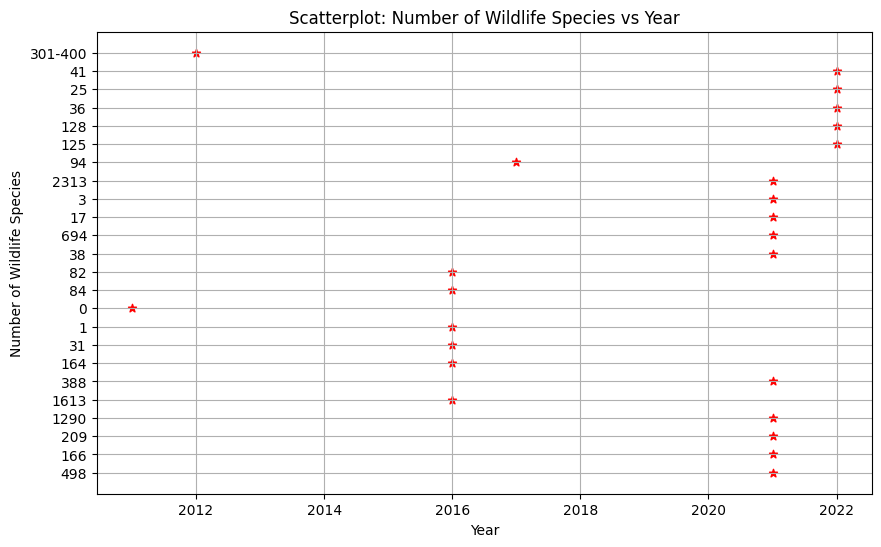

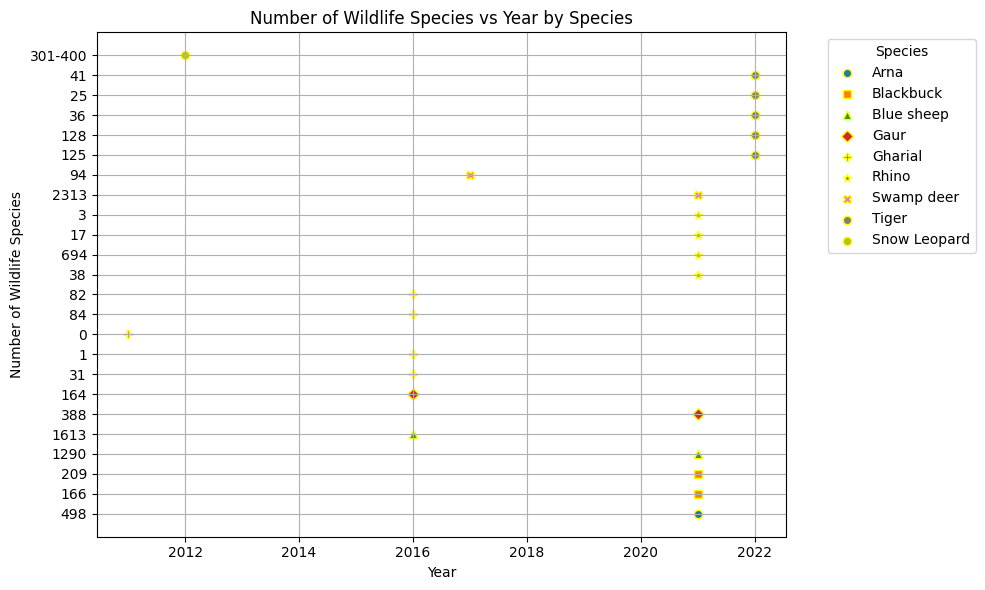

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Number'], color='red', marker='*')
plt.title("Scatterplot: Number of Wildlife Species vs Year")
plt.xlabel('Year')
plt.ylabel('Number of Wildlife Species')
plt.grid()
plt.show()

unique_species = df['Species'].unique()
colors = {species: plt.cm.tab10(i) for i, species in enumerate(unique_species)}
markers = {species: marker for species, marker in zip(unique_species, ['o', 's', '^', 'D', 'P', '*', 'X'])}

plt.figure(figsize=(10, 6))

for species in unique_species:
    subset = df[df['Species'] == species]
    plt.scatter(subset['Year'], subset['Number'],
                color=colors[species],
                label=species, edgecolor='yellow',
                marker=markers.get(species, 'o'))

plt.title('Number of Wildlife Species vs Year by Species')
plt.xlabel('Year')
plt.ylabel('Number of Wildlife Species')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()



# Bar Plot

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

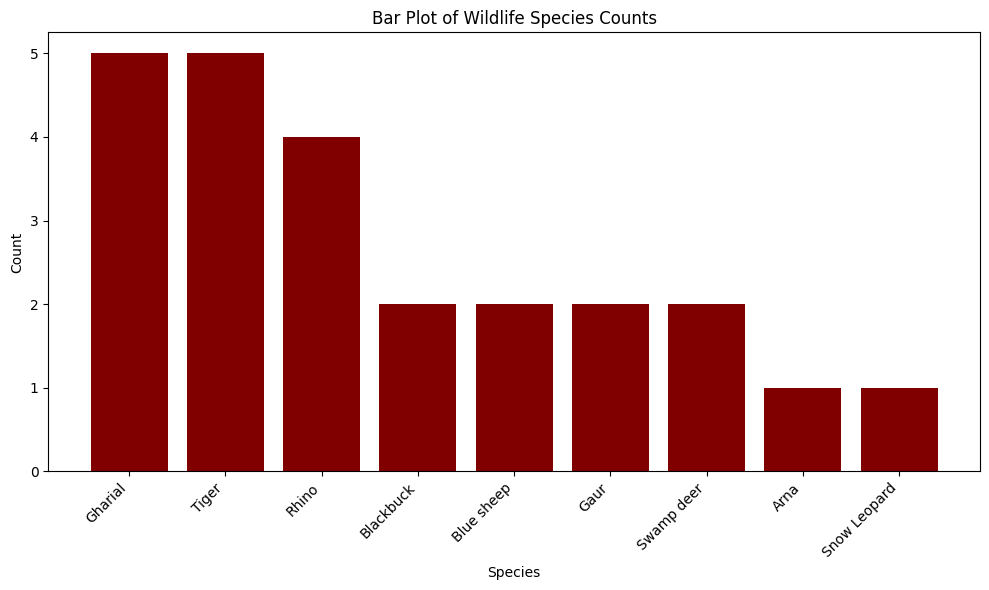

In [ ]:
species_counts = df['Species'].value_counts()
species_counts_df = species_counts.reset_index()
species_counts_df.columns = ['Species', 'Count']


plt.figure(figsize=(10, 6))
plt.bar(species_counts_df['Species'], species_counts_df['Count'], color='maroon')


plt.title('Bar Plot of Wildlife Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

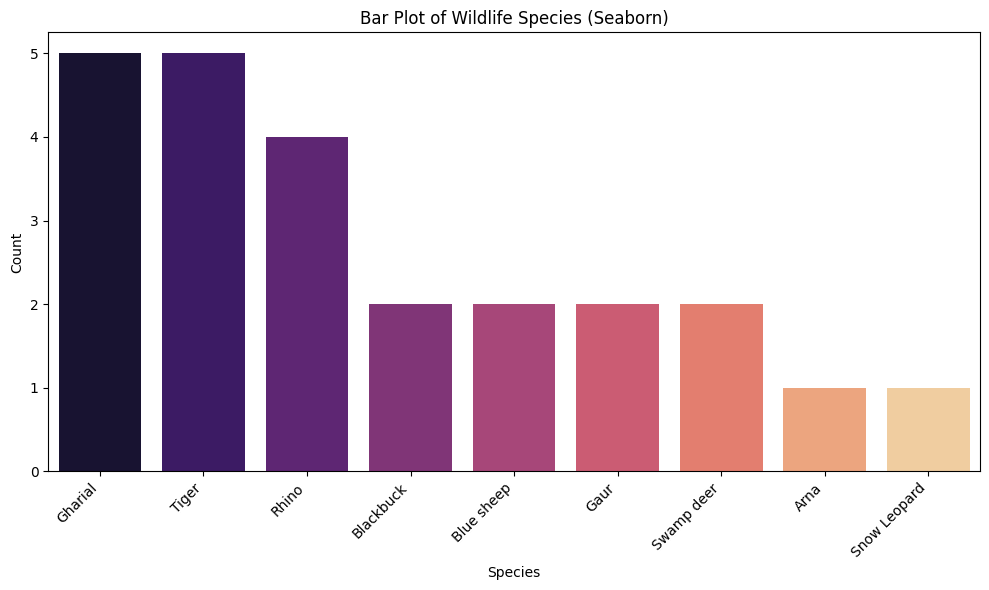

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=species_counts_df,
    x='Species',
    y='Count',
    hue='Species',
    dodge=False,
    palette='magma'
).set(title='Bar Plot of Wildlife Species (Seaborn)')


plt.xticks(rotation=45, ha='right')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


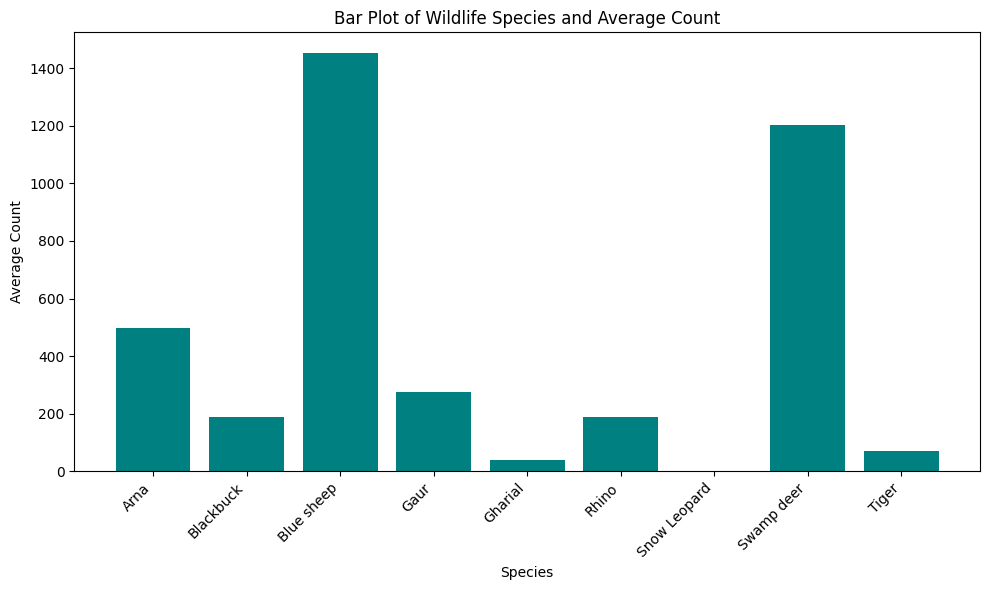

In [ ]:
df['Number'] = pd.to_numeric(df['Number'], errors='coerce')
avg_species_count = df.groupby('Species')['Number'].mean()


plt.figure(figsize=(10, 6))
plt.bar(avg_species_count.index, avg_species_count.values, color='teal')
plt.title('Bar Plot of Wildlife Species and Average Count')
plt.xlabel('Species')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


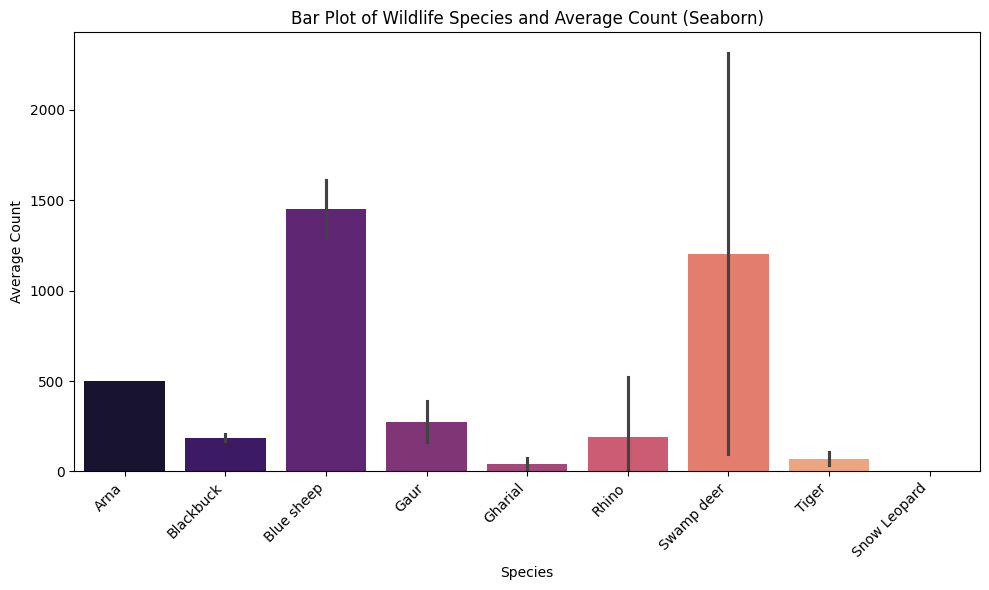

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Species', y='Number', hue='Species', palette='magma', estimator='mean', dodge=False).set(
    title='Bar Plot of Wildlife Species and Average Count (Seaborn)'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Species')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()


***1.Balanced Dataset:***

If the bars for each species have roughly the same height, it indicates that the dataset is balanced with a similar number of entries for each species. This suggests that there isn't any significant overrepresentation or underrepresentation of any particular species.

***2.Overrepresented Species:***

If a particular species has a much taller bar compared to the others, it might suggest that this species is overrepresented in the dataset. This could lead to biased analysis or models if not addressed, as it would dominate the dataset.

***3.Underrepresented Species:***

If a species has a much shorter bar or even no bar at all (indicating no data), it could mean that:
The species is underrepresented or missing in the dataset.
The dataset may have data collection issues, such as incomplete records or rare species being underreported.
Rare categories may not have been captured due to limited sampling, requiring special attention in modeling or analysis.

***4.Identifying Missing or Rare Species:***

Pay attention to any species with very low counts. If there are few instances of a species, it might indicate missing entries or that the species is naturally rare.
Consider whether rare species need special handling or if more data should be collected to represent them adequately.

# Box plots or Whisker plots

Box plot was was first introduced in year 1969 by Mathematician John Tukey.Box plot give a statical summary of the features being plotted.Top line represent the max value,top edge of box is third Quartile, middle edge represents the median,bottom edge represents the first quartile value.The bottom most line respresent the minimum value of the feature.The height of the box is called as Interquartile range.The black dots on the plot represent the outlier values in the data.

<Figure size 1000x600 with 0 Axes>

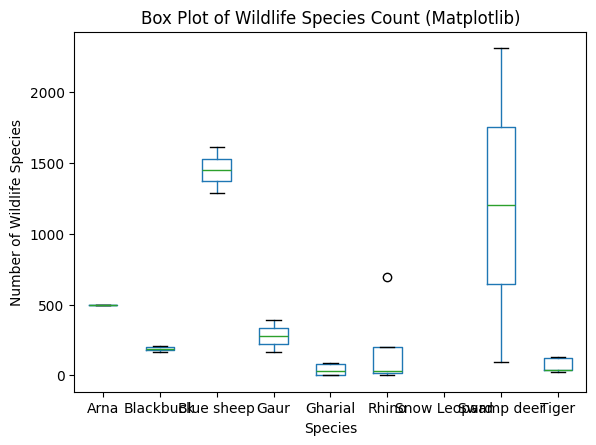

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Number', by='Species', grid=False)
plt.title('Box Plot of Wildlife Species Count (Matplotlib)')
plt.suptitle('')  # Used to suppress the default title to clean up the layout
plt.xlabel('Species')
plt.ylabel('Number of Wildlife Species')
plt.show()

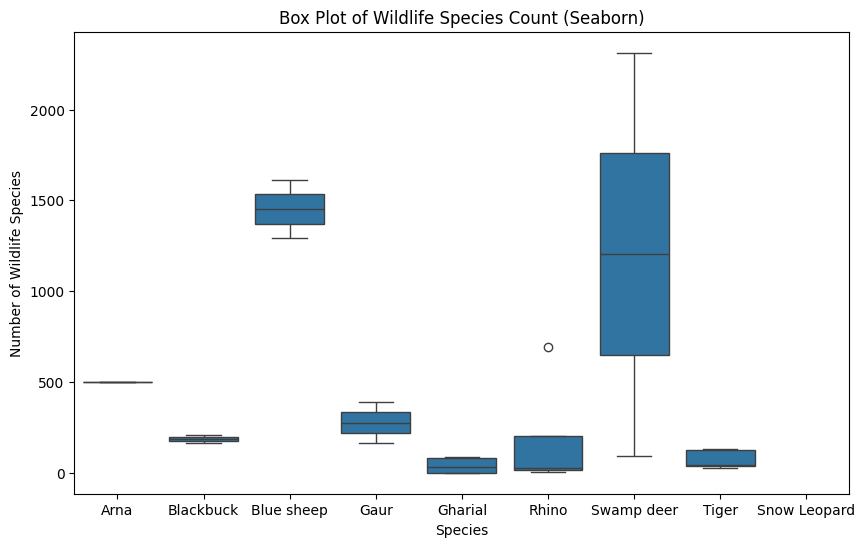

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Species', y='Number')
plt.title('Box Plot of Wildlife Species Count (Seaborn)')
plt.xlabel('Species')
plt.ylabel('Number of Wildlife Species')
plt.show()

***1.Comparison of Species:***

If one species shows a higher median (represented by the line in the middle of the box), it suggests that species has a greater overall count compared to others. This could mean the species is more prevalent in the dataset.

***2.Variation in Counts:***

A wider box for a species indicates that there is a greater variation in the count of wildlife species within that category. This suggests that some records for that species may have significantly higher or lower counts than the majority, leading to more diversity in the data.

***3.Outliers:***

Outliers are data points that appear far outside the typical range of the rest of the data (often marked as individual points).
If a species has outliers, it could indicate unusual data entries, such as data errors (e.g., incorrect recording) or rare occurrences (e.g., extremely high or low counts for that species).
Outliers should be investigated further to determine whether they are valid data points or require cleaning.

***4.Skewed Distribution:***

If the box plot for a species is skewed (where the upper or lower part of the box is longer), it suggests that the distribution of Number values for that species is not symmetrical. A long upper whisker would indicate that a few records have unusually high counts, while a long lower whisker would indicate a few records have unusually low counts.

# **Heatmap**

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours. The Seaborn package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator's requirement.

To create a heatmap of the Iris dataset, we typically focus on visualizing the correlation matrix, which shows the relationships between numerical features. A heatmap is a great way to visualize these correlations.

Computes the Pearson correlation matrix, showing the pairwise correlation coefficients between numerical features. Values range from:

+1: Perfect positive correlation.

0: No correlation.

-1: Perfect negative correlation.

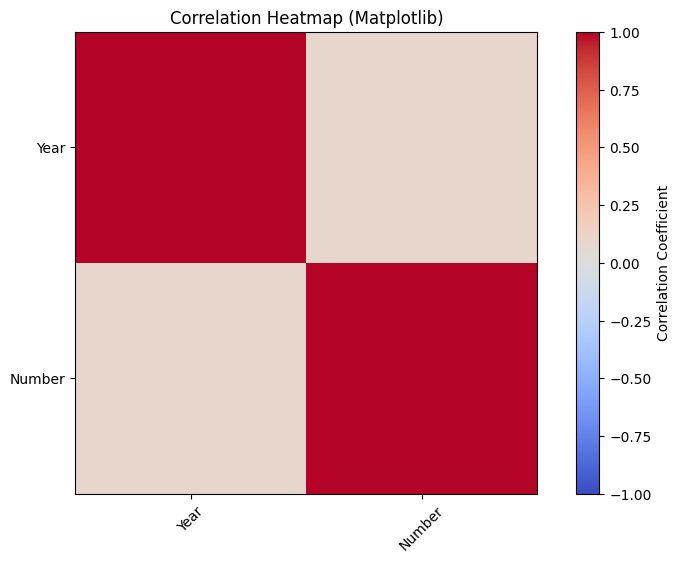

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap (Matplotlib)')
plt.clim(-1, 1)
plt.show()

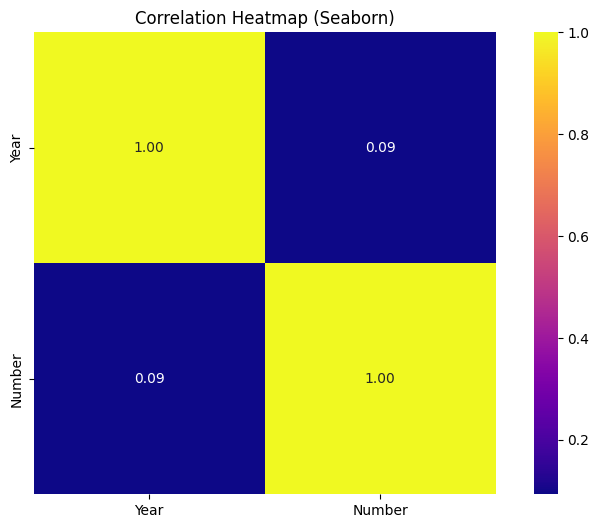

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', square=True)
plt.title('Correlation Heatmap (Seaborn)')
plt.show()

***1.Strong Positive Correlation:***

Values close to +1 indicate a strong positive linear relationship. For example, if the count of one species increases, the count of another species might increase similarly.

***2.Strong Negative Correlation:***

Values close to -1 suggest a strong negative correlation. If one species' count increases, the other species' count may decrease.

***3.Weak or No Correlation:***

Values close to 0 suggest little or no linear relationship. For example, if Species count has little or no correlation with other variables, they may not influence each other in a predictable way.

# **Violin Plot**
Violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual data points, the violin plot features a kernel density estimation of the underlying distribution.

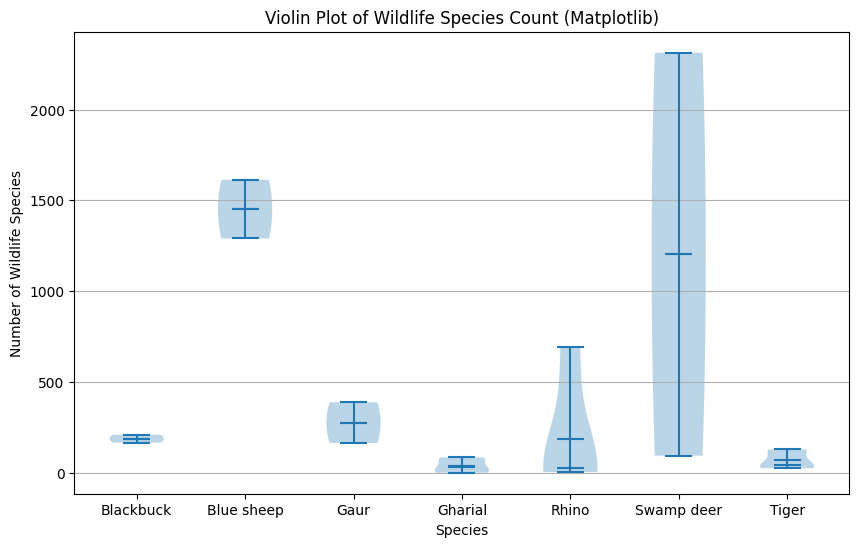

In [ ]:
species = df['Species'].unique()
data = [df[df['Species'] == s]['Number'] for s in species]

filtered_data = [d for d in data if len(d) > 1]
filtered_species = [species[i] for i, d in enumerate(data) if len(d) > 1]


plt.figure(figsize=(10, 6))
plt.violinplot(filtered_data, showmeans=True, showmedians=True)

plt.title('Violin Plot of Wildlife Species Count (Matplotlib)')
plt.xlabel('Species')
plt.ylabel('Number of Wildlife Species')
plt.xticks(ticks=np.arange(1, len(filtered_species) + 1), labels=filtered_species)
plt.grid(axis='y')
plt.show()

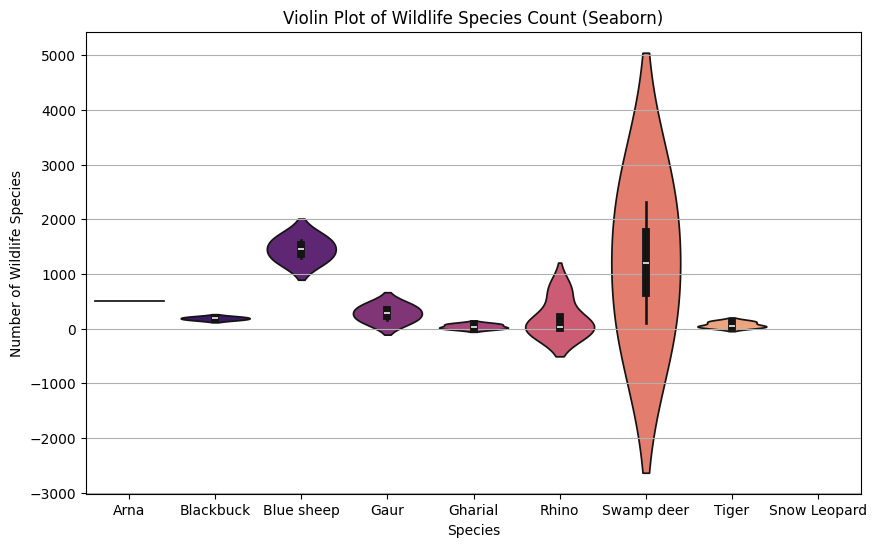

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Species', y='Number', hue='Species', palette='magma', legend=False)
plt.title('Violin Plot of Wildlife Species Count (Seaborn)')
plt.xlabel('Species')
plt.ylabel('Number of Wildlife Species')
plt.grid(axis='y')
plt.show()


# **Histogram**
Histograms are used to represent the frequency distribution of continuous variables. The width of the histogram represents interval and the length represents frequency. To create a histogram you need to create bins of the interval which are not overlapping. Histogram allows the inspection of data for its underlying distribution, outliers, skewness.


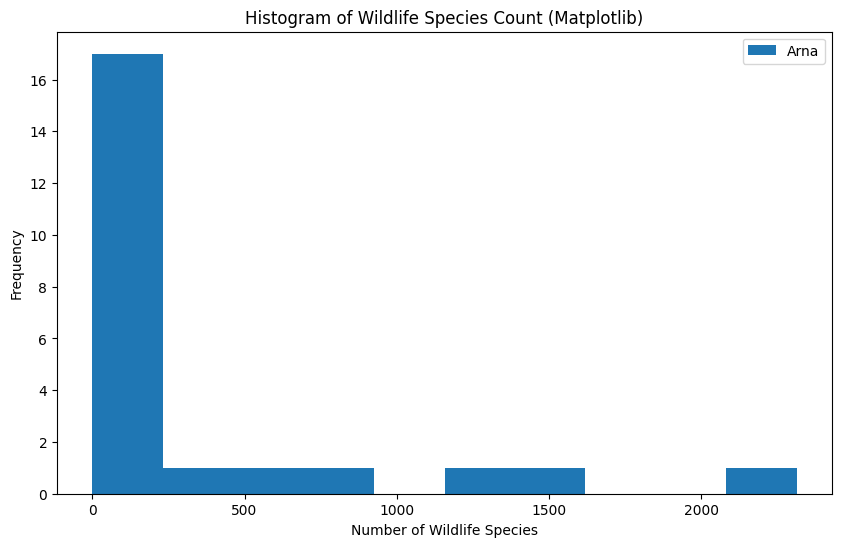

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(df['Number'], bins=10, label=df['Species'].unique())

plt.title('Histogram of Wildlife Species Count (Matplotlib)')
plt.xlabel('Number of Wildlife Species')
plt.ylabel('Frequency')
plt.legend()
plt.show()


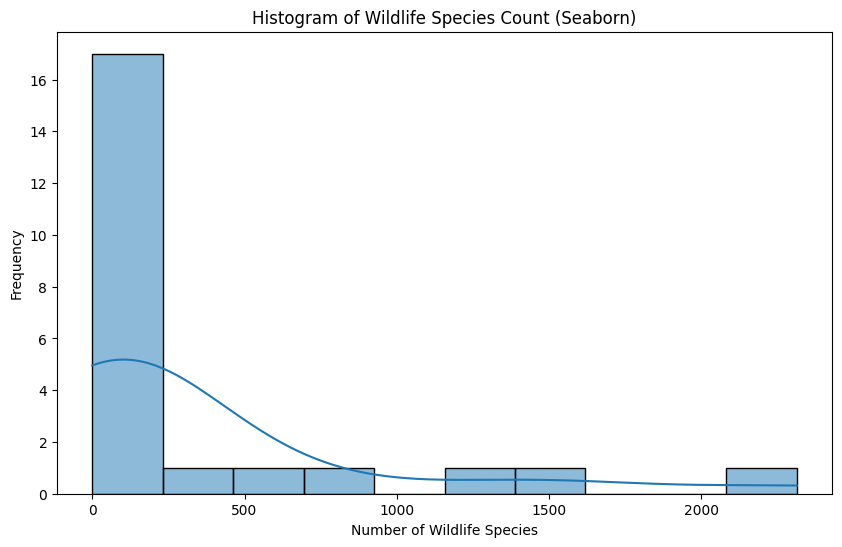

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Number', bins=10, kde=True, alpha=0.5)

plt.title('Histogram of Wildlife Species Count (Seaborn)')
plt.xlabel('Number of Wildlife Species')
plt.ylabel('Frequency')
plt.show()


A right-skewed histogram indicates that most wildlife species have smaller counts, but a few species have much larger counts, pulling the distribution to the right. This suggests that the dataset is imbalanced, with some species being overrepresented.

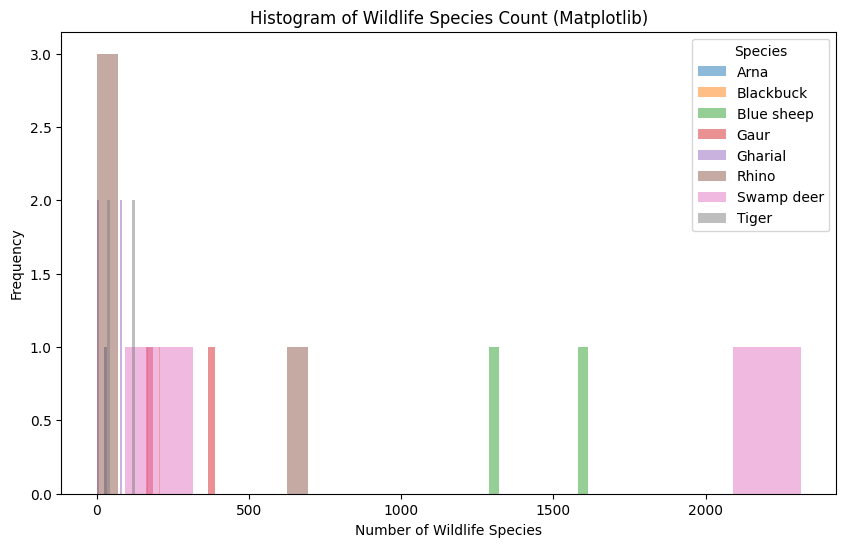

In [ ]:
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    subset = df[df['Species'] == species]

    subset = subset.dropna(subset=['Number'])
    if not subset.empty:
        plt.hist(subset['Number'], bins=10, alpha=0.5, label=species)

plt.title('Histogram of Wildlife Species Count (Matplotlib)')
plt.xlabel('Number of Wildlife Species')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

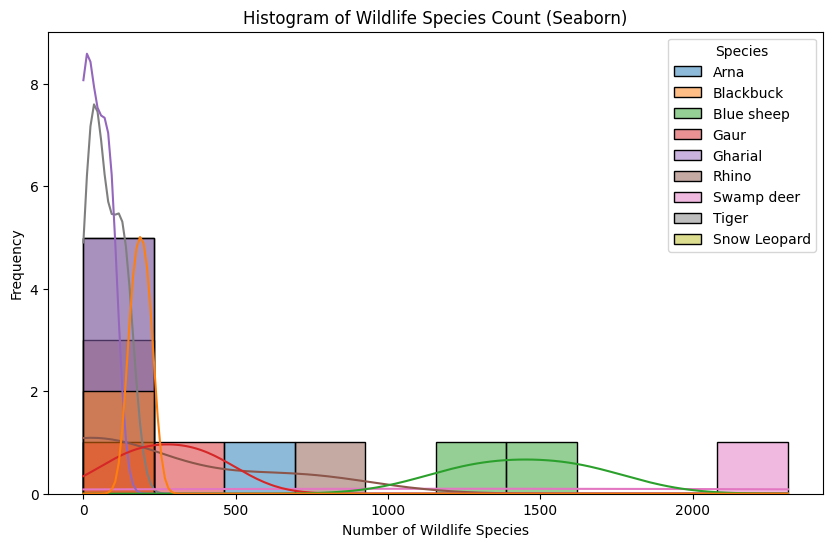

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Number', hue='Species', bins=10, kde=True, alpha=0.5)

plt.title('Histogram of Wildlife Species Count (Seaborn)')
plt.xlabel('Number of Wildlife Species')
plt.ylabel('Frequency')
plt.show()


# **Line Plots/Charts**
Line plots is a graph that is used for the representation of continuous data points on a number line. Line plots are created by first plotting data points on the Cartesian plane then joining those points with a number line. Line plots can help display data points for both single variable analysis as well as multiple variable analysis.

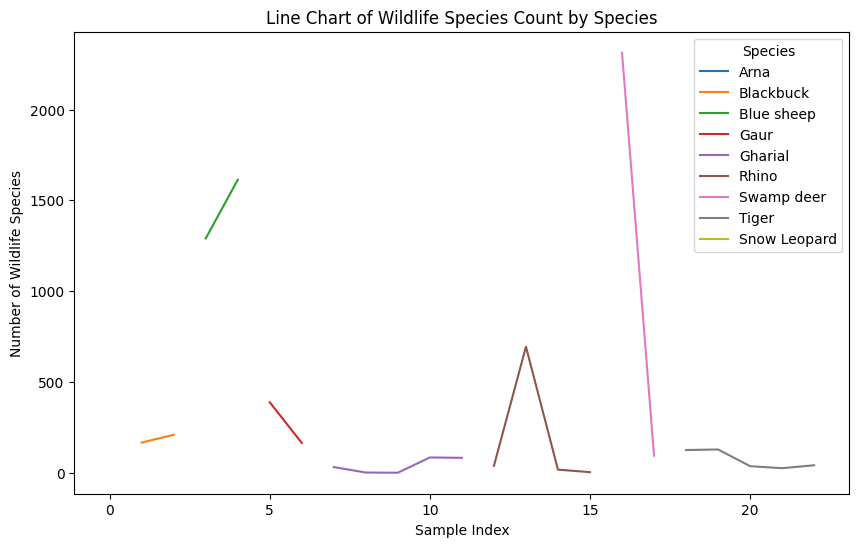

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


for species in df['Species'].unique():
    species_data = df[df['Species'] == species]
    plt.plot(species_data.index, species_data['Number'], label=species)


plt.title('Line Chart of Wildlife Species Count by Species')
plt.xlabel('Sample Index')
plt.ylabel('Number of Wildlife Species')


plt.legend(title='Species')


plt.show()


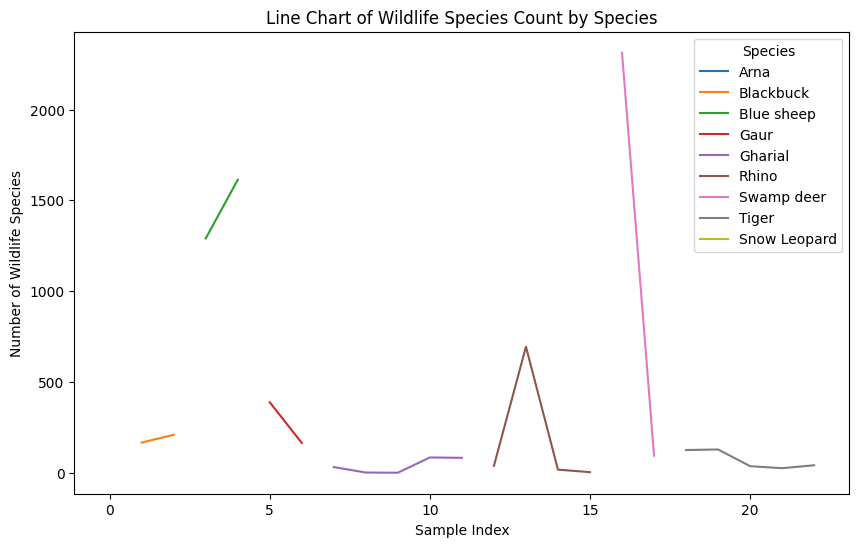

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


sns.lineplot(data=df, x=df.index, y='Number', hue='Species')


plt.title('Line Chart of Wildlife Species Count by Species')
plt.xlabel('Sample Index')
plt.ylabel('Number of Wildlife Species')


plt.show()



A Line Chart of Wildlife Species Count by Species in dataset displays the number of wildlife species for each species group across the different samples. It helps to identify trends and variations in the species counts, showing how certain species may be more prevalent or how their counts fluctuate over the given samples. This chart can highlight whether certain species are overrepresented or underrepresented in the dataset.

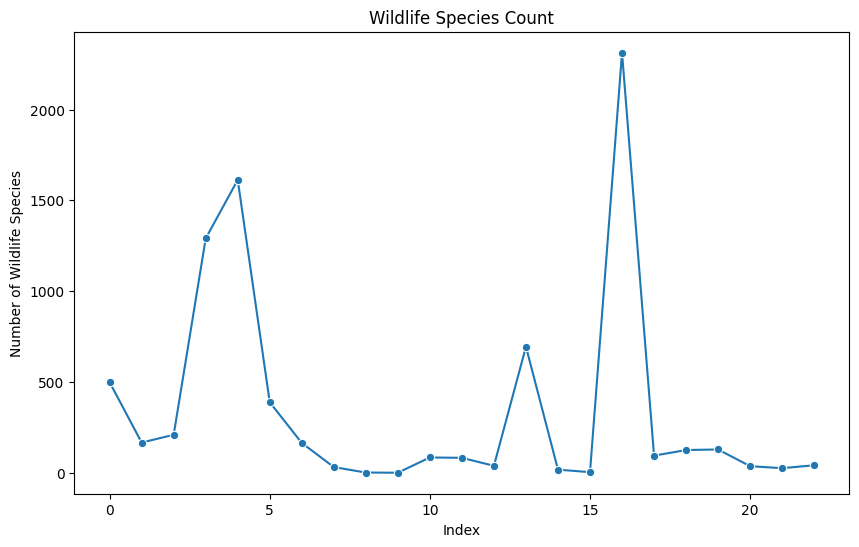

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='Number', marker='o')


plt.title('Wildlife Species Count')
plt.xlabel('Index')
plt.ylabel('Number of Wildlife Species')


plt.show()